In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/state_crime.csv')

In [ ]:
df.head(5)

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [ ]:
print(df.columns)

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')


In [ ]:
print(df.shape)

(3115, 21)


In [ ]:
# 인구에 따른 살인 비율의 위치 추정
data = df[['State', 'Year', 'Data.Population', 'Data.Rates.Violent.Murder']]
data

,State,Year,Data.Population,Data.Rates.Violent.Murder
0,Alabama,1960,3266740,12.4
1,Alabama,1961,3302000,12.9
2,Alabama,1962,3358000,9.4
3,Alabama,1963,3347000,10.2
4,Alabama,1964,3407000,9.3
...,...,...,...,...
3110,Wyoming,2015,586107,2.7
3111,Wyoming,2016,585501,3.4
3112,Wyoming,2017,579315,2.6
3113,Wyoming,2018,577737,2.3


In [ ]:
data_2010 = data[data['Year'] == 2010]
data_2010.head(10)

,State,Year,Data.Population,Data.Rates.Violent.Murder
50,Alabama,2010,4785401,5.7
110,Alaska,2010,714146,4.3
170,Arizona,2010,6413158,6.4
230,Arkansas,2010,2921588,4.6
290,California,2010,37338198,4.8
350,Colorado,2010,5047692,2.6
410,Connecticut,2010,3575498,3.7
470,Delaware,2010,899792,5.7
530,District of Columbia,2010,604912,21.8
590,Florida,2010,18838613,5.2


In [ ]:
print(np.mean(data_2010['Data.Rates.Violent.Murder']))
print(np.median(data_2010['Data.Rates.Violent.Murder']))
# 차이가 크면 outlier 영향

4.4692307692307685
4.3


In [ ]:
from scipy import stats

In [ ]:
print(stats.trim_mean(data_2010['Data.Population'], 0.3))

4360381.2727272725


(array([2.305e+03, 7.350e+02, 3.600e+01, 1.300e+01, 1.100e+01, 4.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 5.000e+00]),
 array([ 0.2 ,  8.24, 16.28, 24.32, 32.36, 40.4 , 48.44, 56.48, 64.52,
        72.56, 80.6 ]),
 <BarContainer object of 10 artists>)

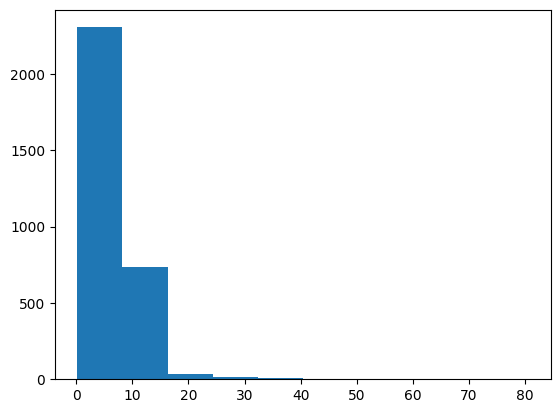

In [ ]:
plt.hist(data['Data.Rates.Violent.Murder'])

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [ ]:
labels = df['target']
labels

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
data = df.drop(labels=['target'], axis=1)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
labels.value_counts()

1    526
0    499
Name: target, dtype: int64

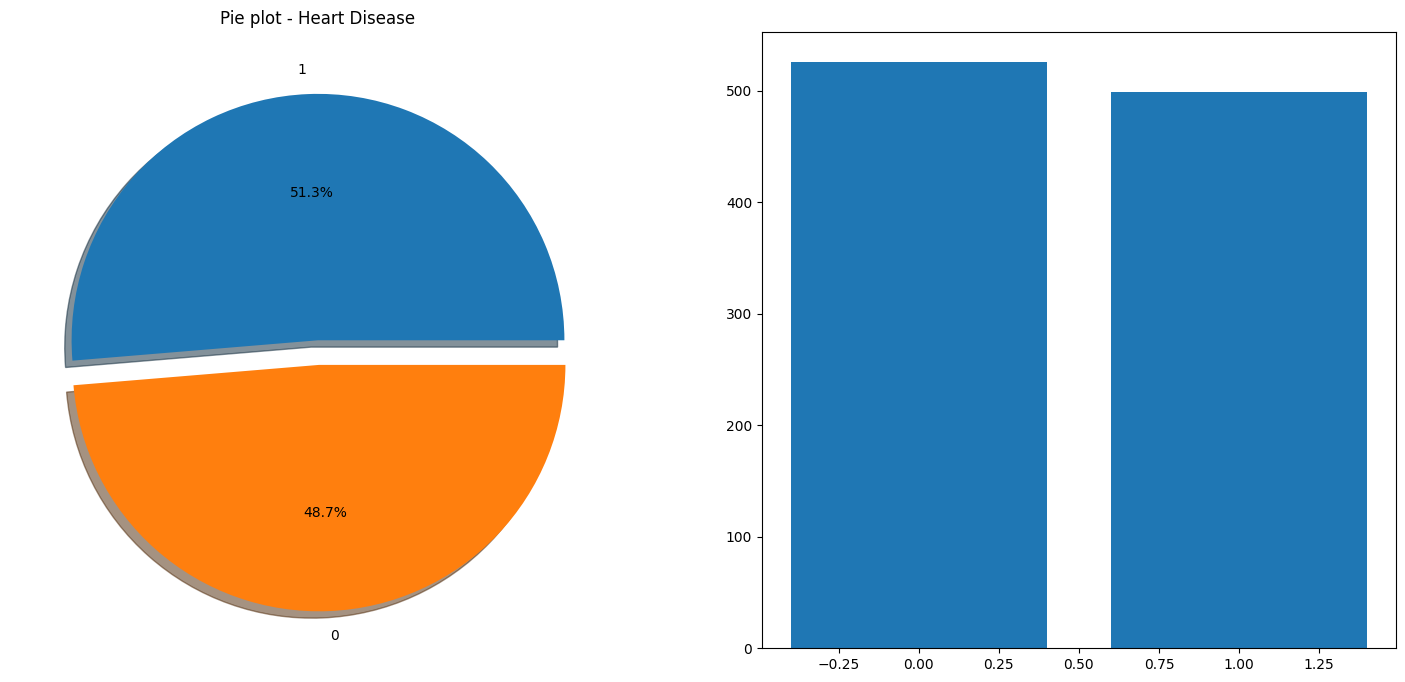

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

labels.value_counts().plot.pie(ax=ax[0], shadow=True, explode=[0, 0.1], autopct='%1.1f%%')
ax[0].set_title('Pie plot - Heart Disease')
ax[0].set_ylabel('')

plt.bar([0,1], labels.value_counts())
plt.show()

In [ ]:
# 나이에 따른 심장질환자 분석
import seaborn as sns

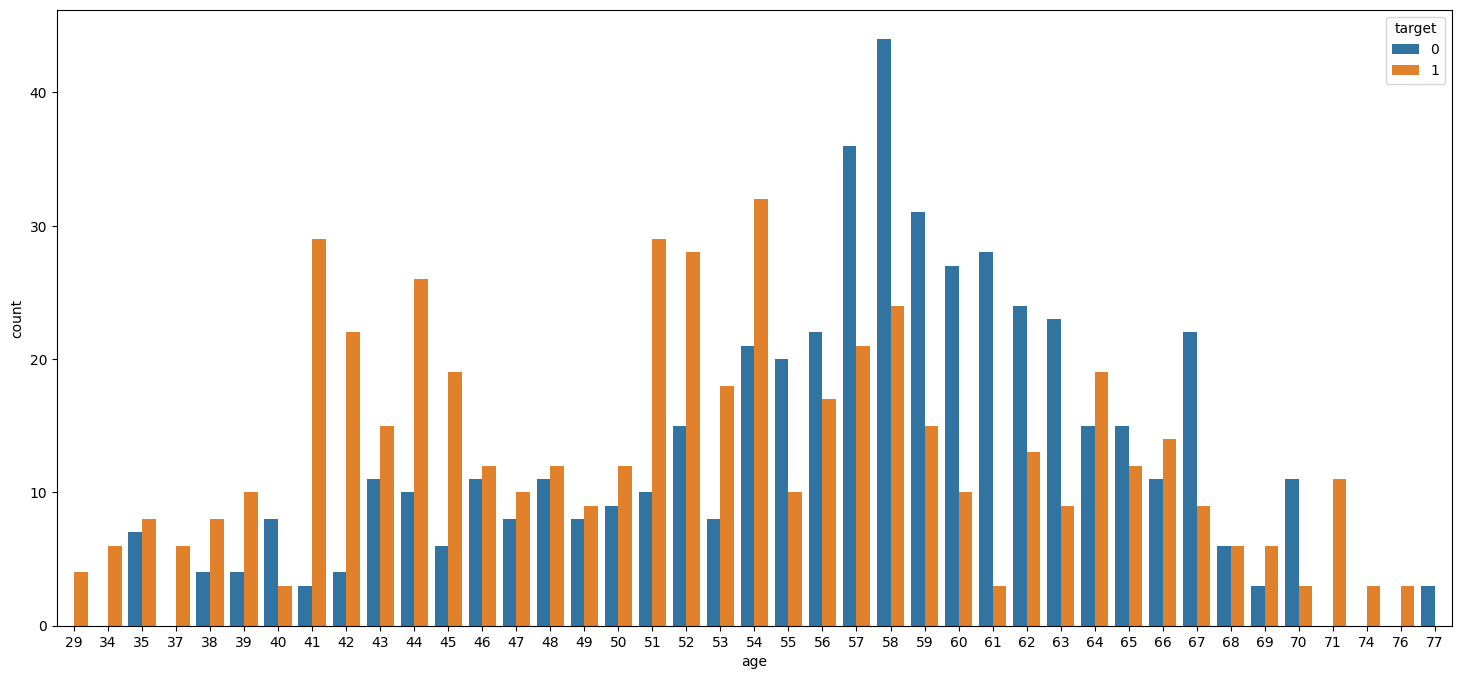

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(18,8))
sns.countplot(x='age', hue='target', data=df, ax=ax)
plt.show()

In [ ]:
df[['age', 'target']].groupby('target', as_index=True).mean()

,age
target,
0,56.569138
1,52.408745


In [ ]:
df[['sex','target']].groupby('sex', as_index=True).mean()

,target
sex,
0,0.724359
1,0.420757


In [ ]:
pd.crosstab(df['sex'],df['target'], margins=True)

target,0,1,All
sex,,,
0,86,226,312
1,413,300,713
All,499,526,1025


<Axes: xlabel='cp', ylabel='count'>

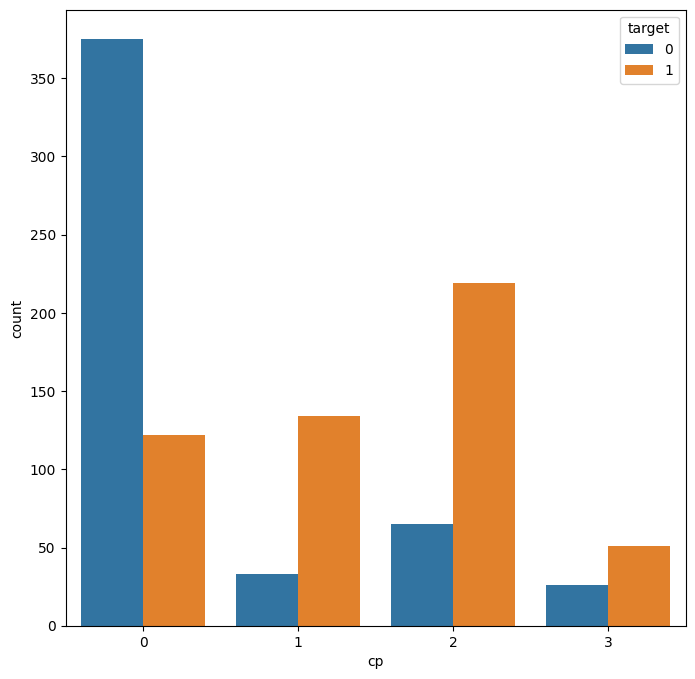

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8,8))

sns.countplot(x='cp', hue='target', data=df)

# 가슴 통증이 있을 경우 심장 질환 확률이 높다
# 가슴 통증이 있을 경우 병원을 가야한다

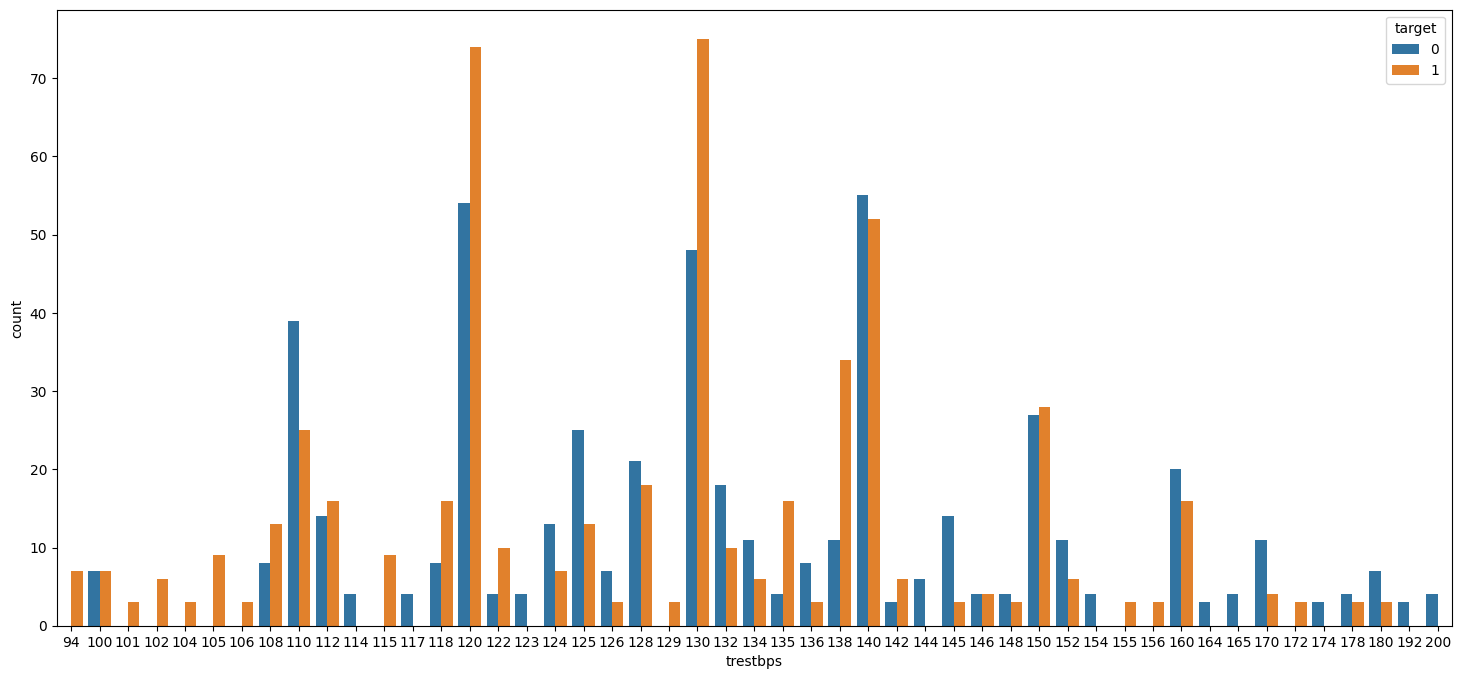

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(18,8))

sns.countplot(x='trestbps', hue='target', data=df)
plt.show()
# 혈압과 심장병 발생률은 관계 없다.

In [ ]:
df['chol_range'] = pd.cut(df['chol'], np.arange(100, 600, 50), right=False)

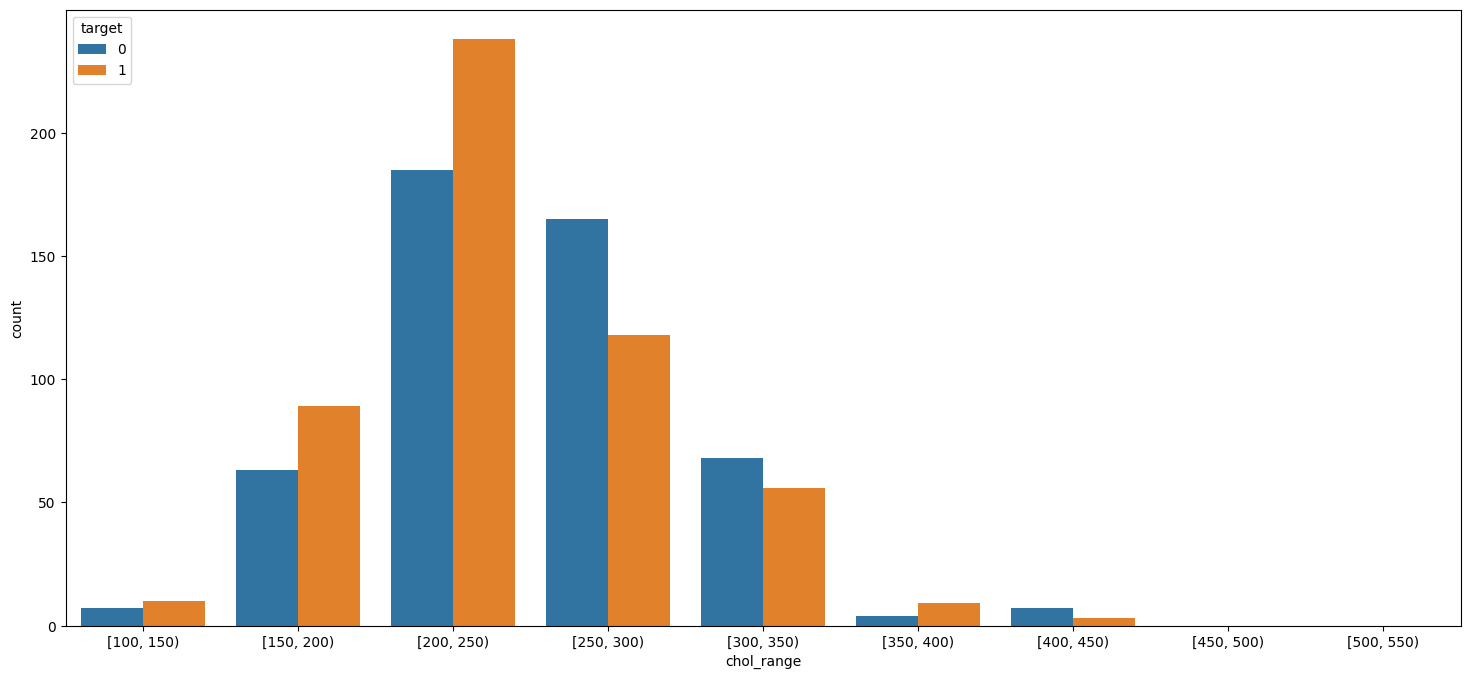

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(18,8))

sns.countplot(x='chol_range', hue='target', data=df)
plt.show()
# 콜레스테롤 수치와 심장병 발생률은 관계 없다.

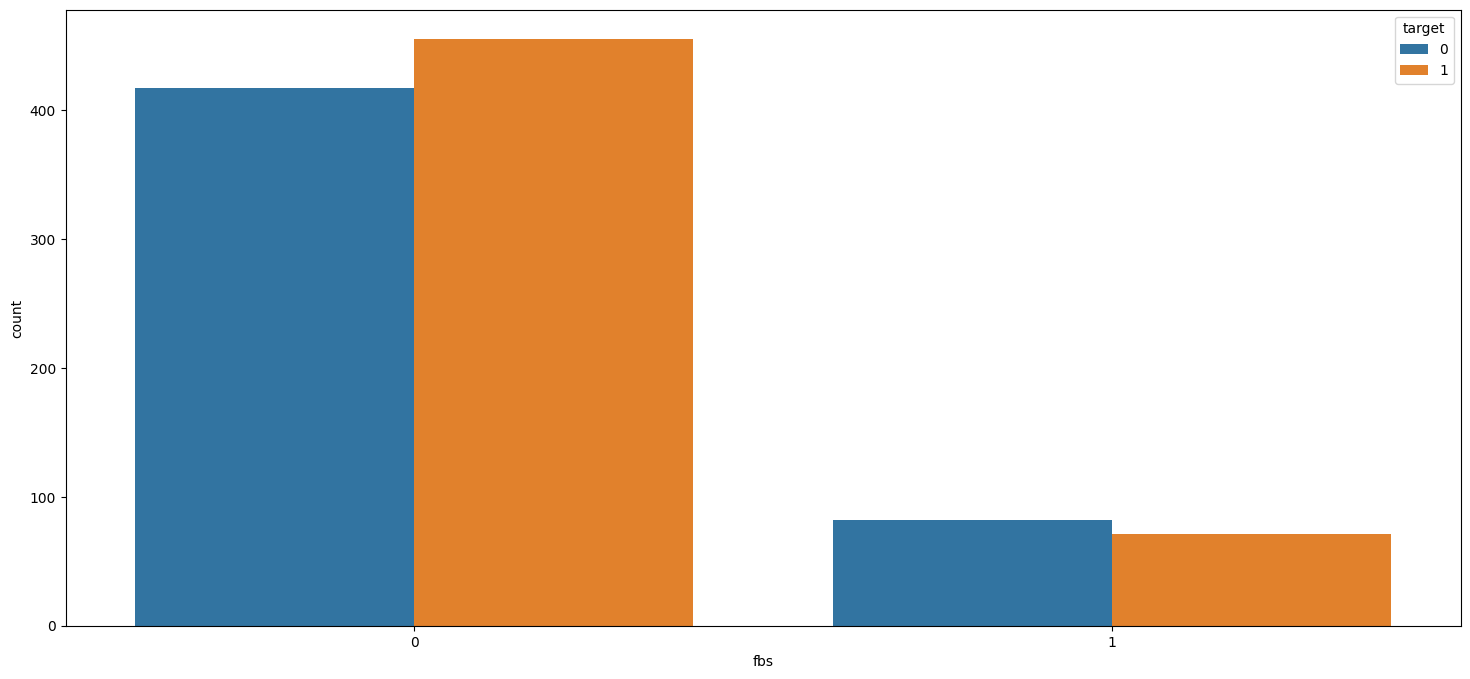

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(18,8))

sns.countplot(x='fbs', hue='target', data=df)
plt.show()
# 공복혈당과 심장병 발생률 관계 없다

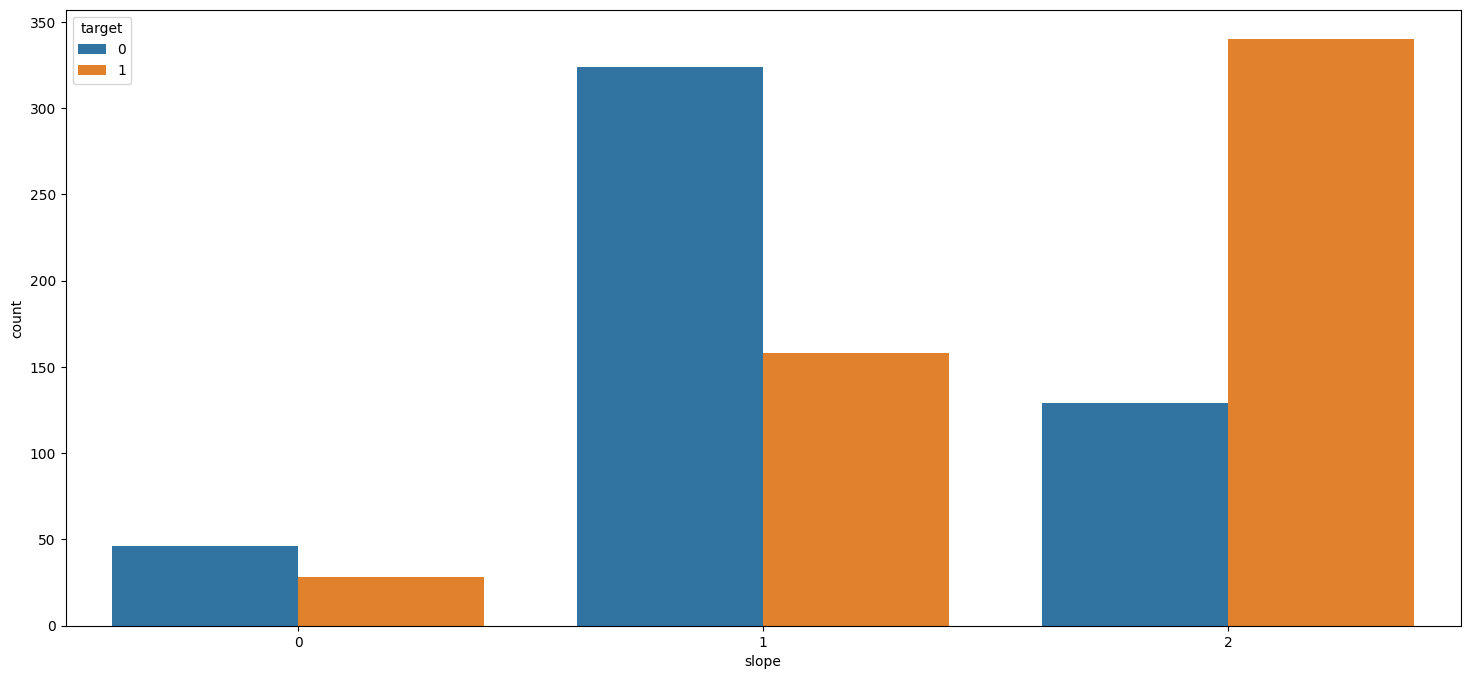

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(18,8))

sns.countplot(x='slope', hue='target', data=df)
plt.show()

# slope 증가할수록 심장병 발생확률 높아진다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

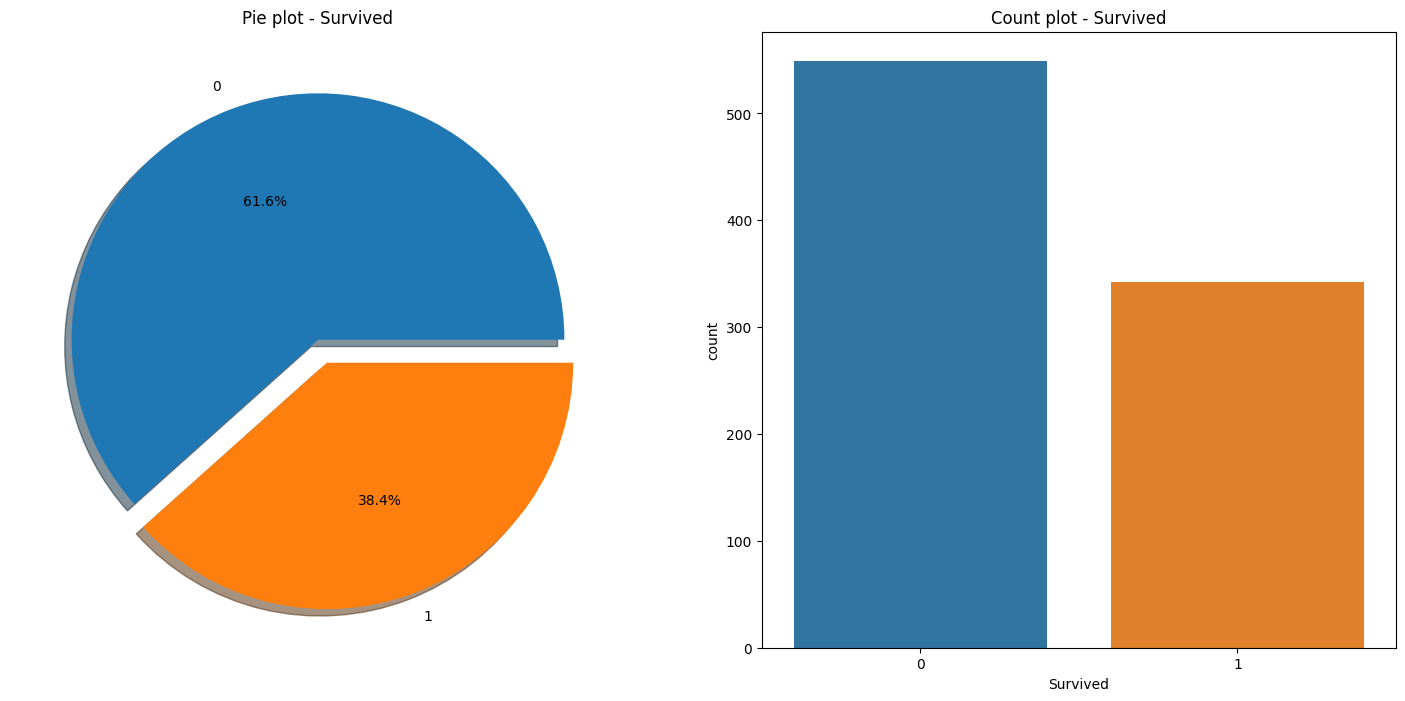

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df['Survived'].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%', explode=[0, 0.1])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 데이터가 충분히 많고 생존자 분포가 제법 균일하기 때문에 데이터 분석이 통계적으로 유의미 하다는 것을 알 수 있다

In [ ]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


<Axes: xlabel='Pclass'>

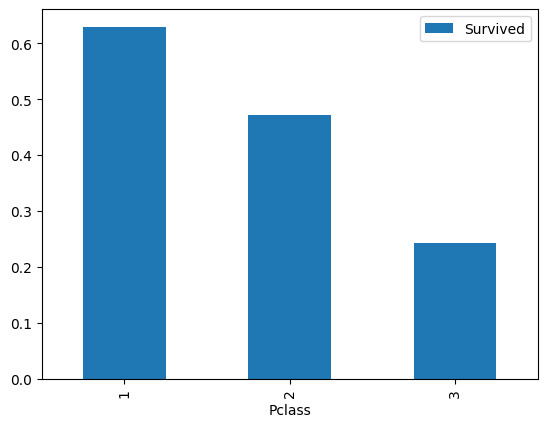

In [95]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

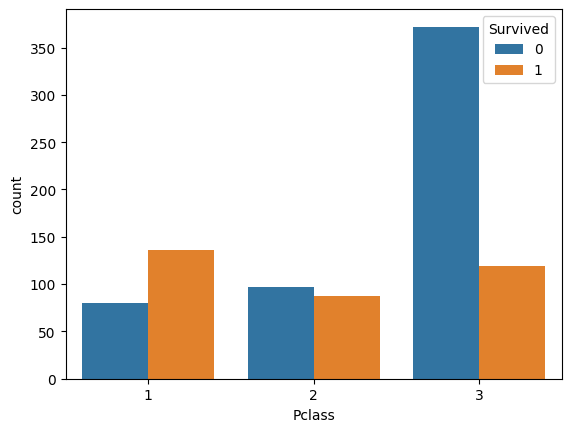

In [97]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

In [ ]:
# Pclass에 따른 생존자 분석
# 클래스가 높을수록 생존 확률이 높은 것을 확인할 수 있다
# 나중에 모델을 만들 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다

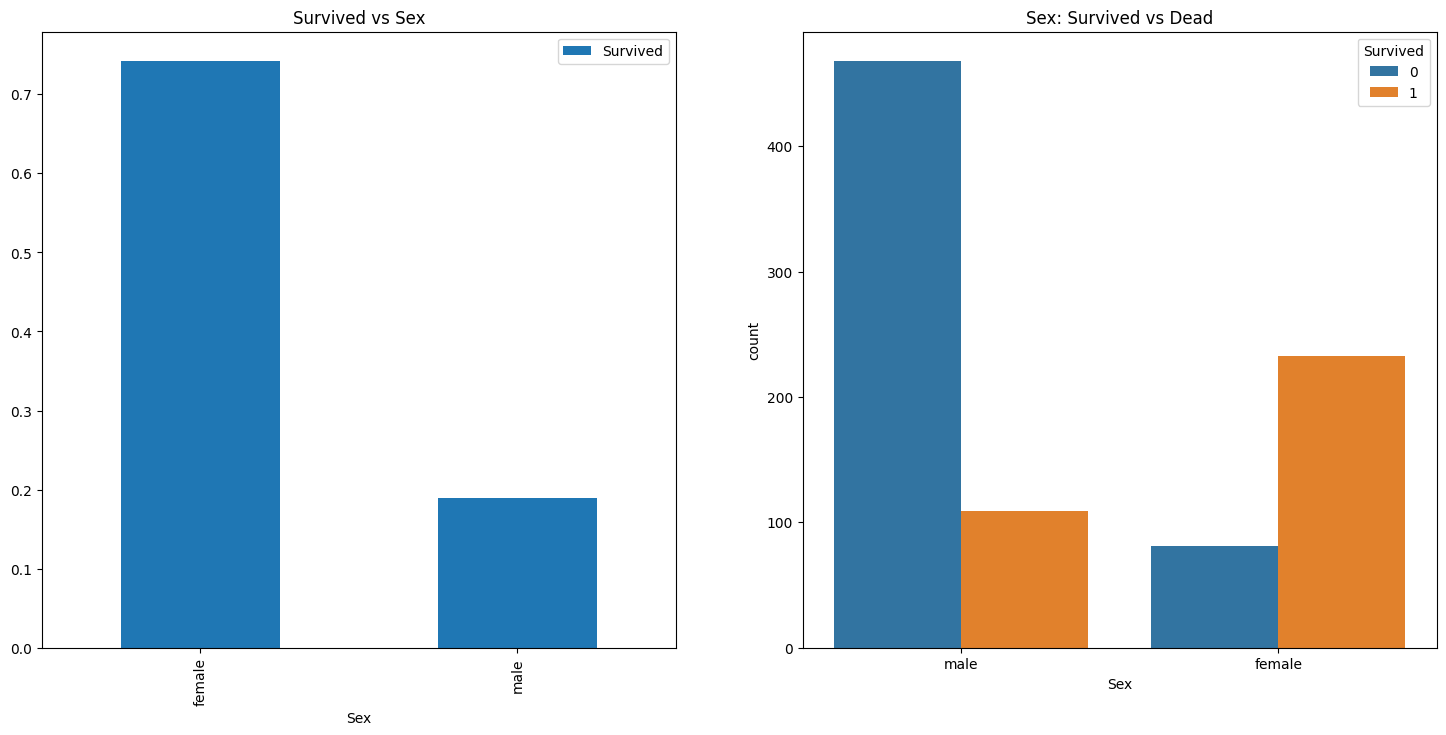

In [99]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df[['Sex', 'Survived']].groupby('Sex', as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [101]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [102]:
pd.crosstab(df['Sex'], df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [103]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


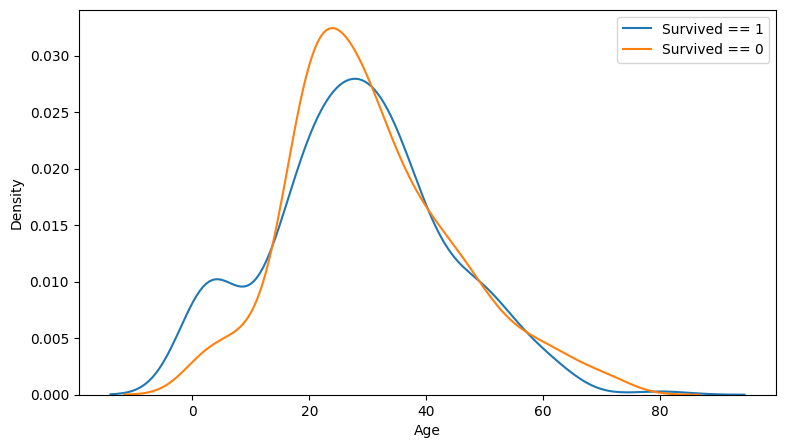

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))

sns.kdeplot(df[df['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

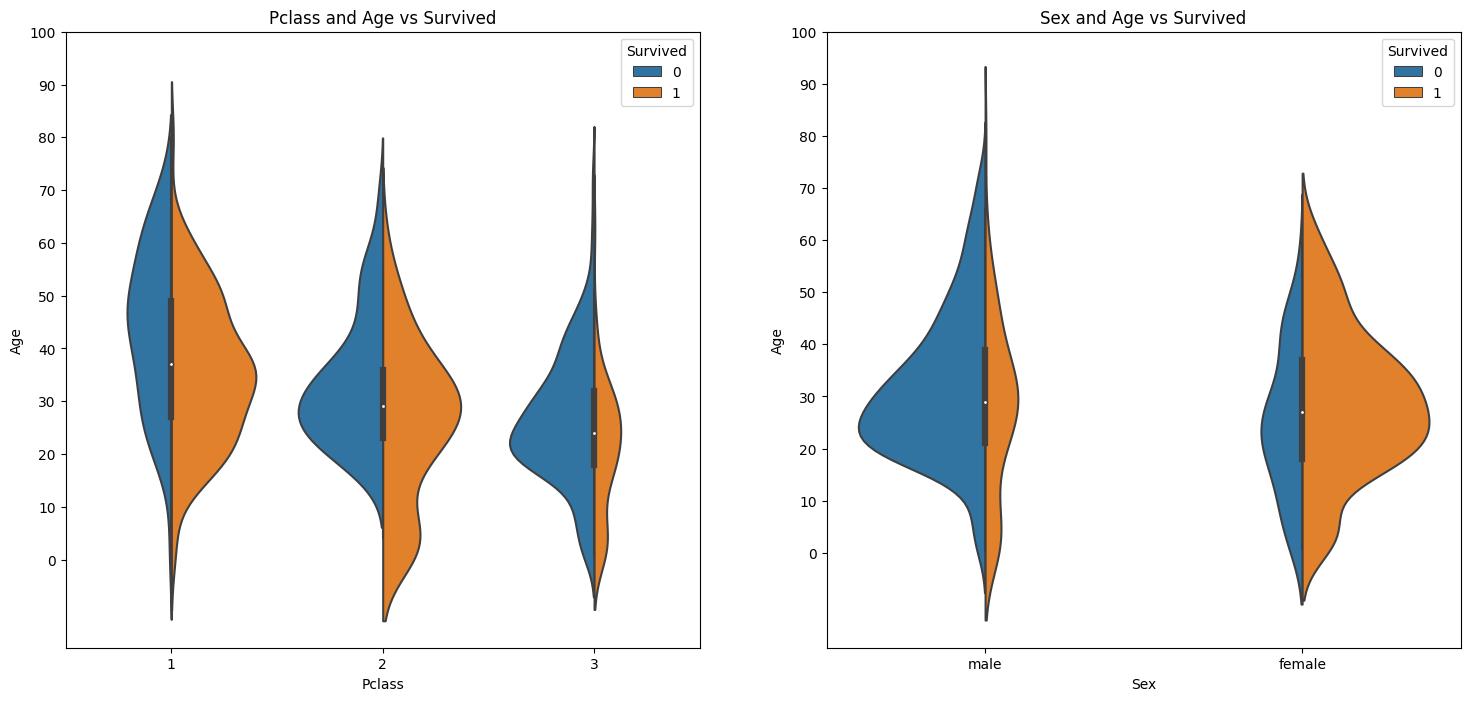

In [109]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, scale="count", split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


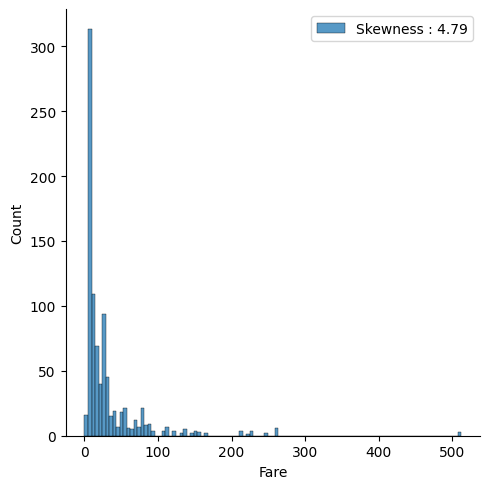

In [112]:
sns.displot(df['Fare'], label='Skewness : {:.2f}'.format(df['Fare'].skew()), ax=ax)
plt.legend(loc='best')
plt.show()

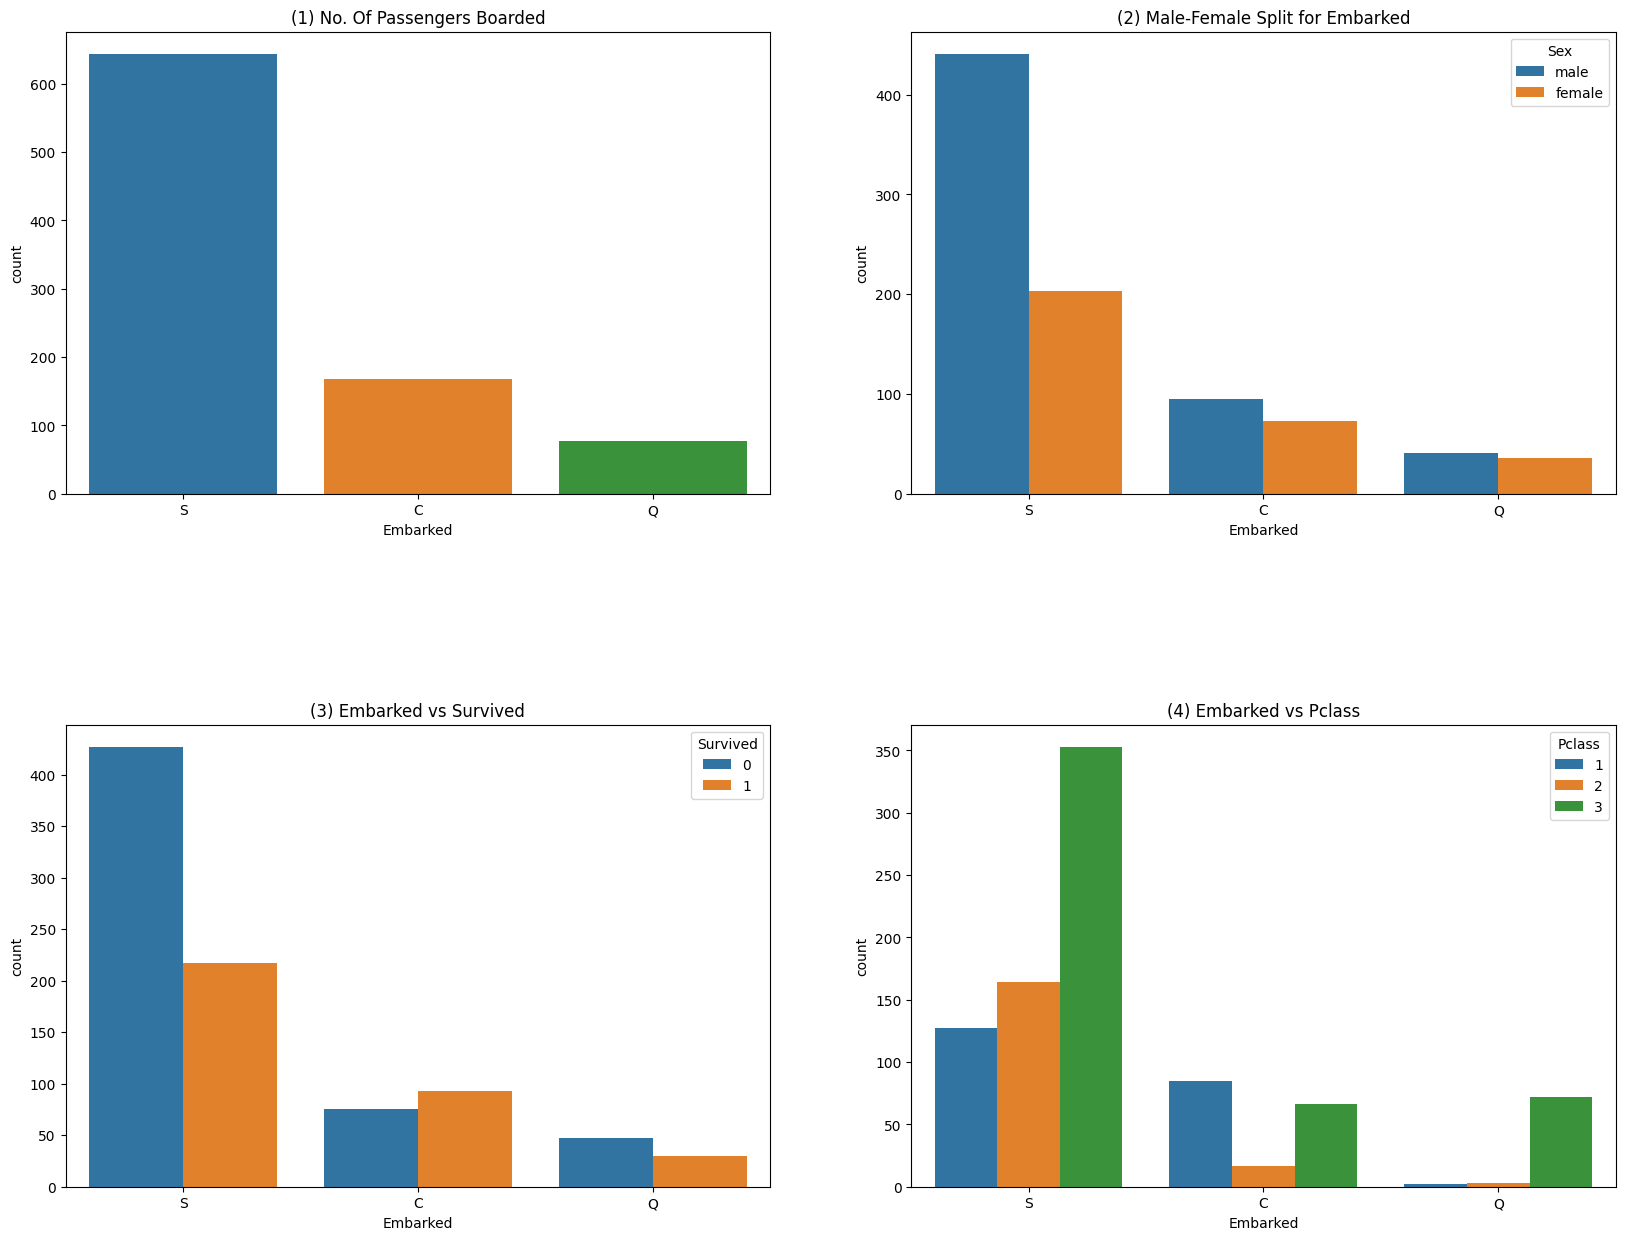

In [117]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x='Embarked', data=df, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', data=df, hue='Sex', ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', data=df, hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

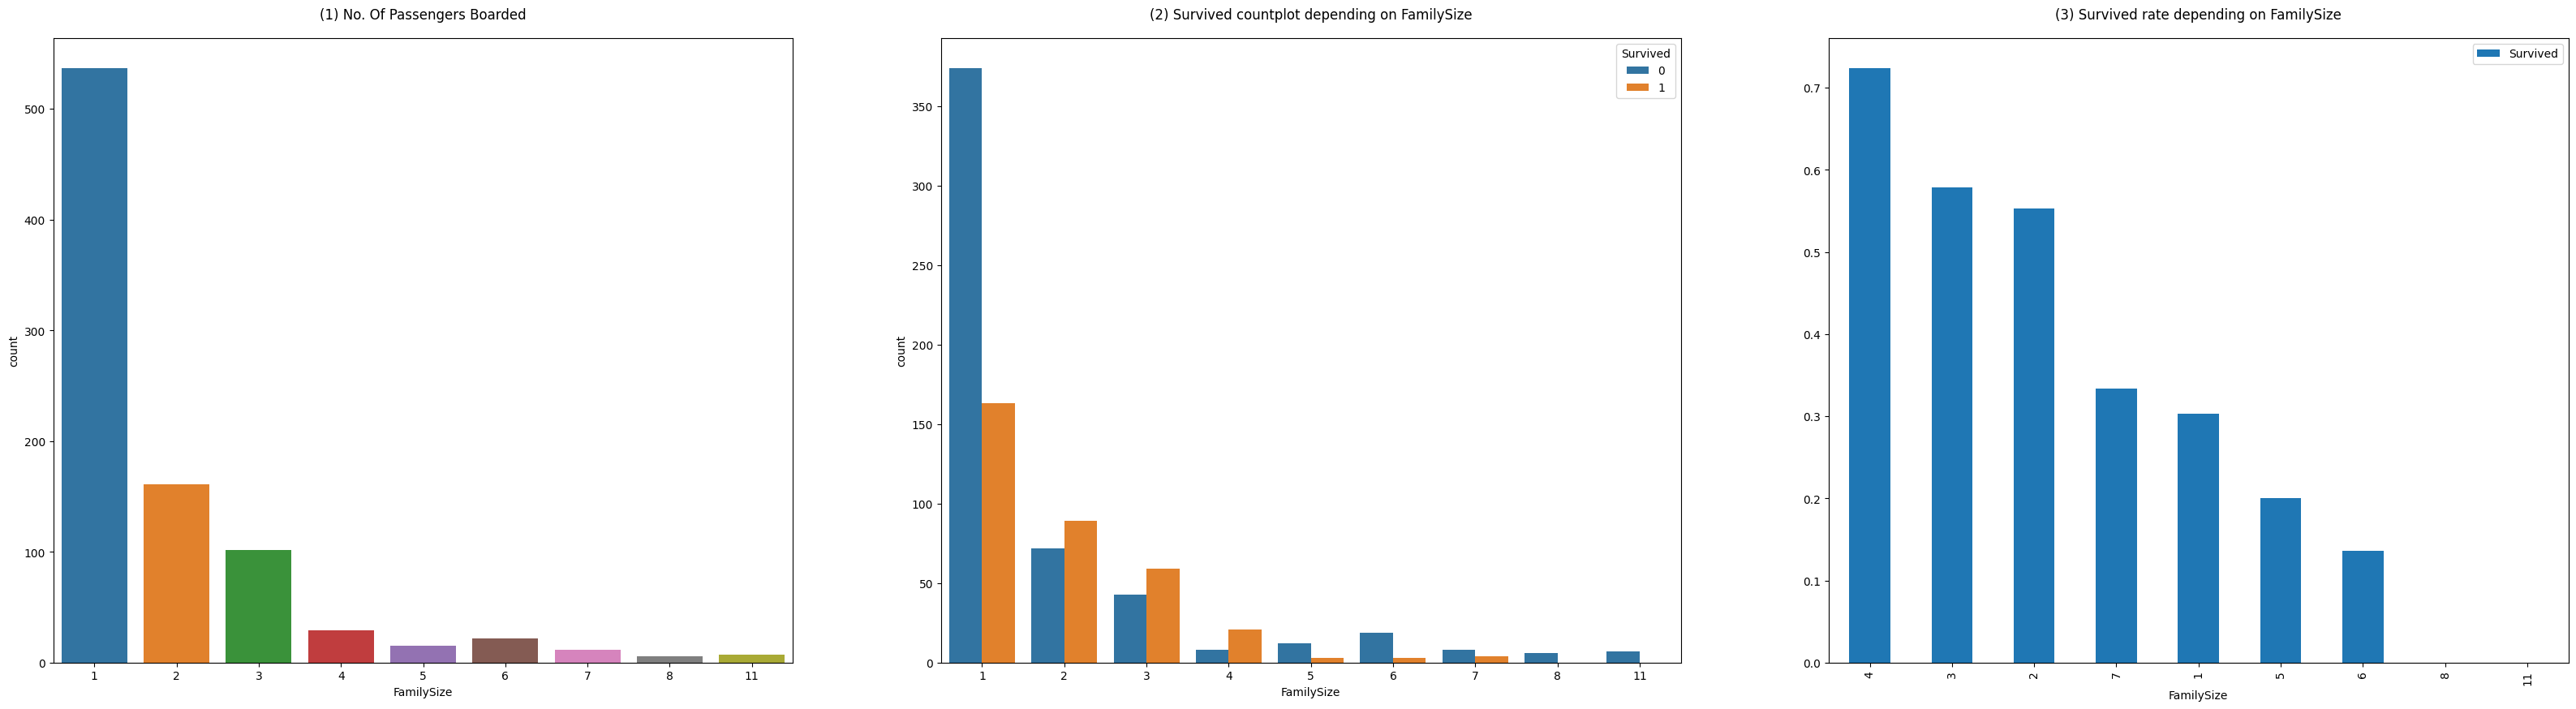

In [125]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.show()